# Лабораторная 2

Выполнил студент группы 9381 Кравченко Павел

## Цель работы
Цель работы – практическое применение дискретного преобразования Фурье c использованием библиотек Python для анализа речевых сигналов.

## Данные для работы
1) Средствами ОС записать свой речевой сигнал.  
2) Фраза — Добрый день, я учусь в университете ЛЭТИ, на факультете компьютерных технологий и информатики.  
3) Формат записи — моно-сигнал, 16000 гц или 22000 гц, без сжатия (wav-формат).  

## Задачи лабораторной работы

1) Используя ДПФ построить траекторию основного тона (F0) на записи своего голоса.  
2) Используя ДПФ построить траектории второй, третьей и четвертой формантных частот на записи своего голоса.  
3) Построить сонограмму по записи своего голоса.  


In [1]:
from scipy.io import wavfile
import scipy.io

sampleRate, data = wavfile.read('2.wav')

/tmp/ipykernel_4418/2178640732.py:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampleRate, data = wavfile.read('2.wav')


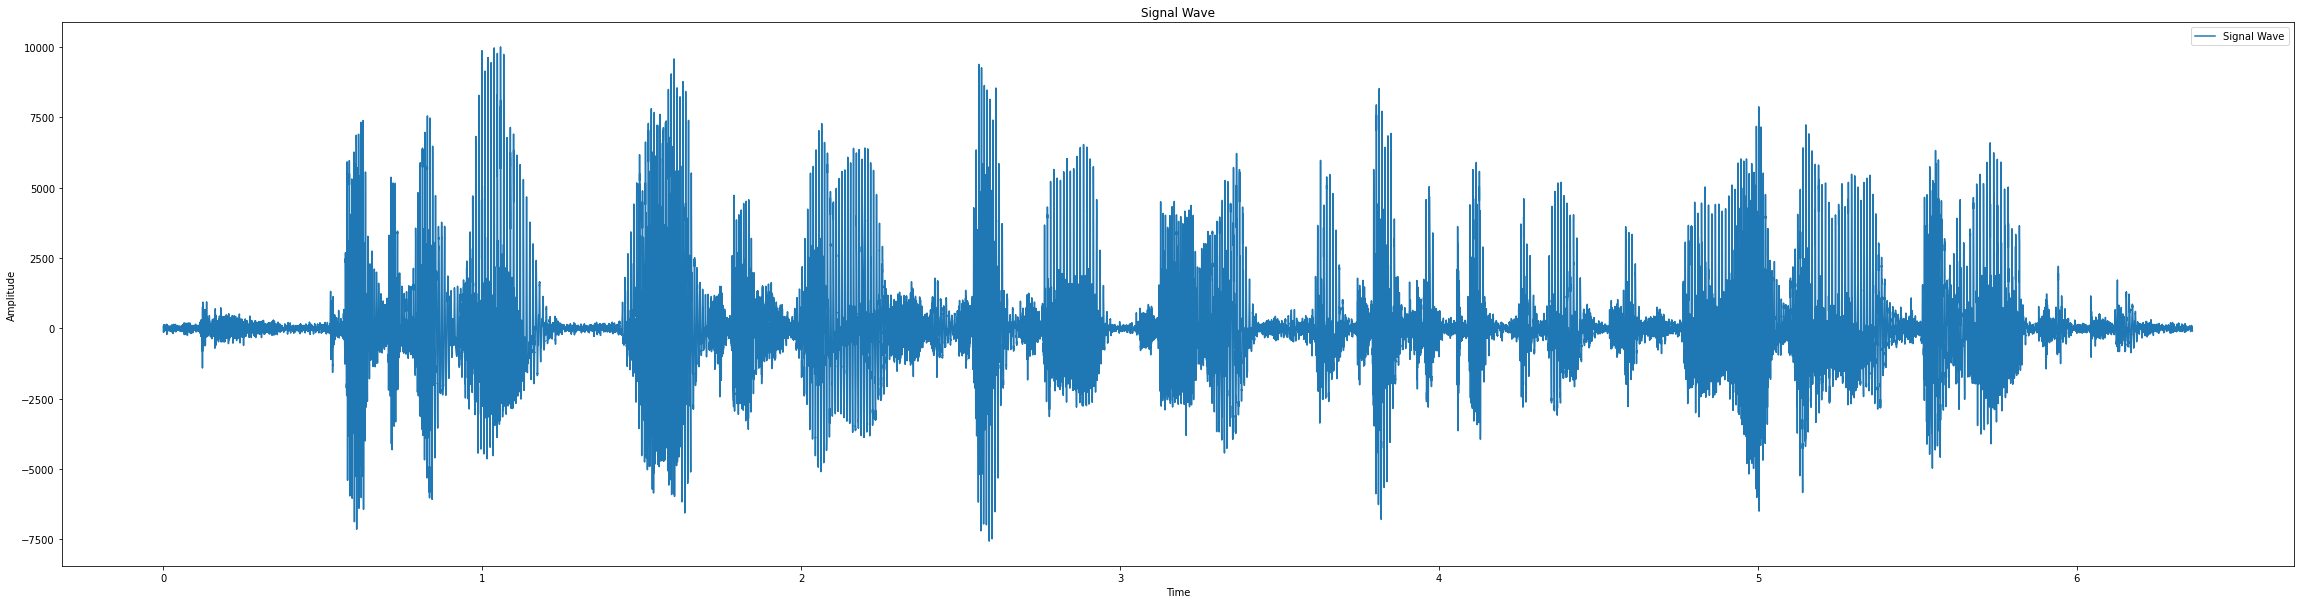

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import more_itertools as mit

lengthSignal = len(data) / sampleRate
time = np.linspace(0, lengthSignal, len(data))
f = plt.figure()
f.set_figwidth(40)
f.set_figheight(10)
plt.title("Signal Wave")
plt.plot(time, data, label="Signal Wave")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

# Используя ДПФ построить траекторию основного тона (F0) на записи своего голоса.

In [3]:
dimension = 1024
spectr_res = round(sampleRate/dimension)
overlap = 0.25

intervals = list(mit.windowed(data, n=dimension, step=int(overlap*dimension)))
intervals[-1] = [i for i in intervals[-1] if i]
intervals = [i*np.hamming(len(i)) for i in intervals]

In [4]:
def DFT(x):
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

intervals = [DFT(i) for i in intervals]

In [5]:
amplitude_spec = [sum([j**2 for j in i[:int(len(i)/2)]])**0.5 for i in intervals]
amplitude_spec = np.array([i.real for i in amplitude_spec])

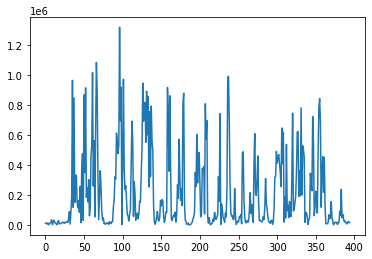

In [6]:
plt.plot(amplitude_spec)

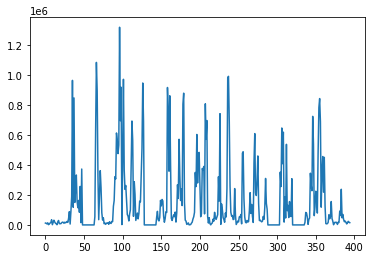

In [7]:
F0 = []   
for i in list(mit.chunked(amplitude_spec, spectr_res)):
    segment = np.array(i)
    if segment.max() > 2.5*segment.mean():            
        F0 += segment.tolist()
    else:
        F0 += [0 for i in range(len(segment))]

plt.plot(F0)        

# Используя ДПФ построить траектории второй, третьей и четвертой формантных частот на записи своего голоса.

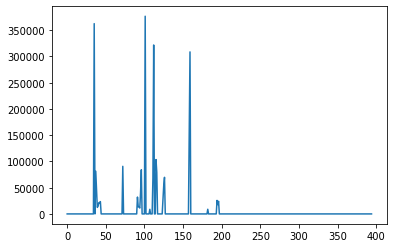

In [8]:
F1 = []
i = 0
while i < len(F0):
    try:
        inter_max = max([F0[2*i], F0[2*i-1], F0[2*i+1]])
        if F0[i] > 2*inter_max:           
            F1.append(inter_max)
        else:
            F1.append(0)
    except:
        F1.append(0)
    i += 1
    

plt.plot(F1)    

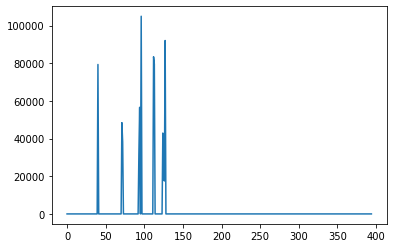

In [9]:
F2 = []
i = 0
while i < len(F0):
    try:
        inter_max = max([F0[3*i], F0[3*i-1], F0[3*i+1]])
        if F0[i] > 4*inter_max:           
            F2.append(inter_max)
        else:
            F2.append(0)
    except:
        F2.append(0)
    i += 1
    

plt.plot(F2) 

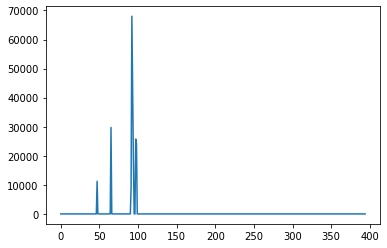

In [10]:
F3 = []
i = 0
while i < len(F0):
    try:
        inter_max = max([F0[4*i], F0[4*i-1], F0[4*i+1]])
        if F0[i] > 8*inter_max:           
            F3.append(inter_max)
        else:
            F3.append(0)
    except:
        F3.append(0)
    i += 1
    

plt.plot(F3) 

# Построить сонограмму по записи своего голоса.

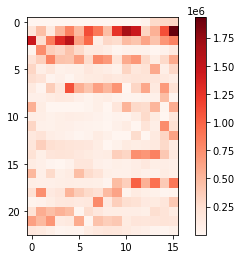

In [12]:
matrix_amp = []

for i in list(mit.chunked(amplitude_spec[:-2], spectr_res)): 
    matrix_amp.append(i)   
matrix_amp = np.array(matrix_amp)


fig, ax = plt.subplots()
h = ax.imshow(matrix_amp, cmap = 'Reds')
fig.colorbar(h)
plt.show()


## Вывод

С использованием ДПФ была построена траектория основного тона (F0), траектории второй, третьей и четвертой формантных частот, а также сонограмма.